In [1]:
## Import Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Explore Data

In [3]:
# Import Data ไฟล์ CSV
df = pd.read_csv("https://raw.githubusercontent.com/KK-PU/K19-MADT8101-CustomerAnalytics/main/V3_Customer%26Churn%26Campaign/Customertravel.csv")

# Explore Data
df.head()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         954 non-null    int64 
 1   FrequentFlyer               954 non-null    object
 2   AnnualIncomeClass           954 non-null    object
 3   ServicesOpted               954 non-null    int64 
 4   AccountSyncedToSocialMedia  954 non-null    object
 5   BookedHotelOrNot            954 non-null    object
 6   Target                      954 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 52.3+ KB


In [5]:
#ดึงข้อมูลจาก dataset แค่ column ที่ต้องการดู
df[['Age', 'FrequentFlyer']].head()


,Age,FrequentFlyer
0,34,No
1,34,Yes
2,37,No
3,30,No
4,30,No


In [6]:
#การตัด N/A ออกจาก dataset
df.isna().sum()

Age                           0
FrequentFlyer                 0
AnnualIncomeClass             0
ServicesOpted                 0
AccountSyncedToSocialMedia    0
BookedHotelOrNot              0
Target                        0
dtype: int64

In [7]:
df.describe()

,Age,ServicesOpted,Target
count,954.000000,954.000000,954.000000
mean,32.109015,2.437107,0.234801
std,3.337388,1.606233,0.424097
min,27.000000,1.000000,0.000000
25%,30.000000,1.000000,0.000000
50%,31.000000,2.000000,0.000000
75%,35.000000,4.000000,0.000000
max,38.000000,6.000000,1.000000


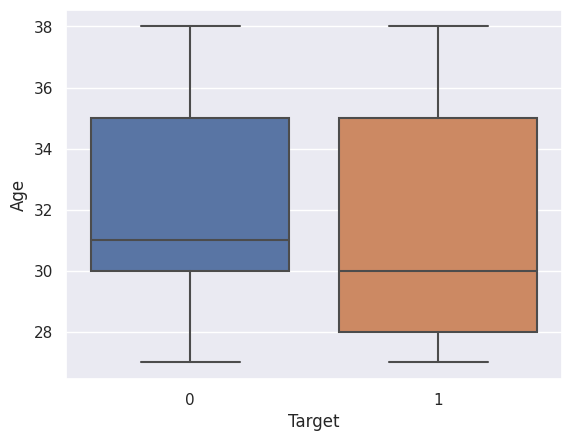

In [8]:
#Explore avg Age--อายุที่ต้องการทราบ by Target--เป้าหมายที่ต้องการ

sns.boxplot(data=df, x='Target', y='Age')
plt.show()

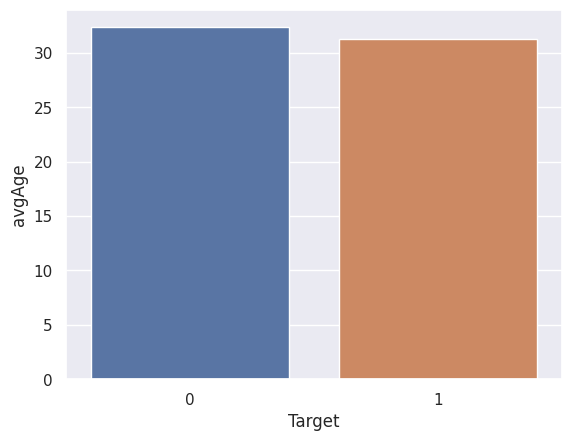

In [9]:
#Explore avg Age by Target

df_by_target = df.groupby(by=['Target']).agg(
          avgAge=('Age','mean'),
          avgServicesOpted=('ServicesOpted','mean')).reset_index()

sns.barplot(data=df_by_target, x='Target', y='avgAge')
plt.show()

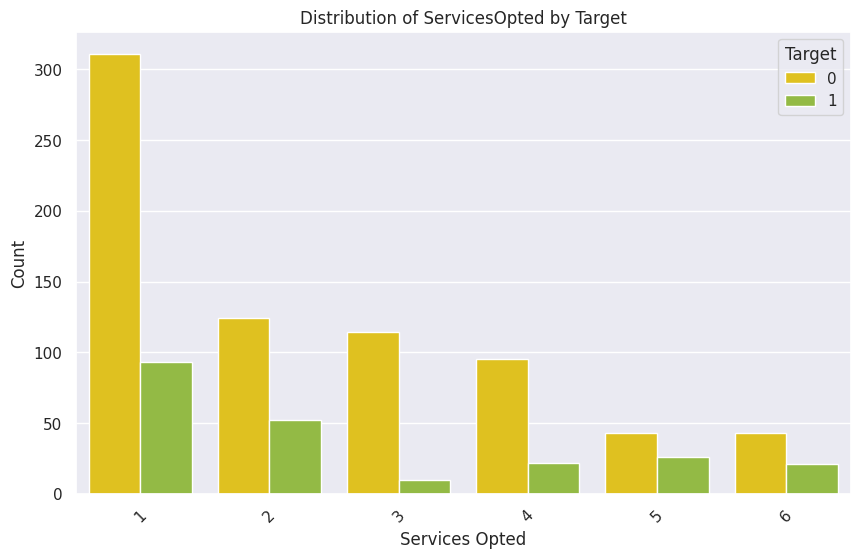

In [10]:
#Explore ServicesOpted by Target

##-------ทำการวิเคราะห์แบบกราฟ-------
# Set custom color palette
custom_palette = ["#FFD700", "#9ACD32"]  # Replace with your desired colors
# Create a bar plot to show the distribution of ServicesOpted by Target
plt.figure(figsize=(10, 6))
sns.countplot(x="ServicesOpted", hue="Target", data=df, palette=custom_palette)
plt.title("Distribution of ServicesOpted by Target")
plt.xlabel("Services Opted")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Target")
plt.show()




แสดงกราฟที่ทำการแยกประเภทของ ServicesOpted ออกตาม Target (0 , 1) โดยแสดงจำนวนบนแกน y และประเภทบนแกน x ให้เห็นถึงความเกี่ยวข้องกันระหว่าง ServicesOpted และผลลัพธ์ Target ได้จากกราฟนี้ได้

## Group the data

In [11]:
avg_services_by_target = df.groupby("Target")["ServicesOpted"].mean()


##Average ServicesOpted by Target
จัดกลุ่มข้อมูลตาม "Target" และคำนวณค่าเฉลี่ยของ ServicesOpted แล้วเก็บผลลัพธ์ในตัวแปร avg_services_by_target

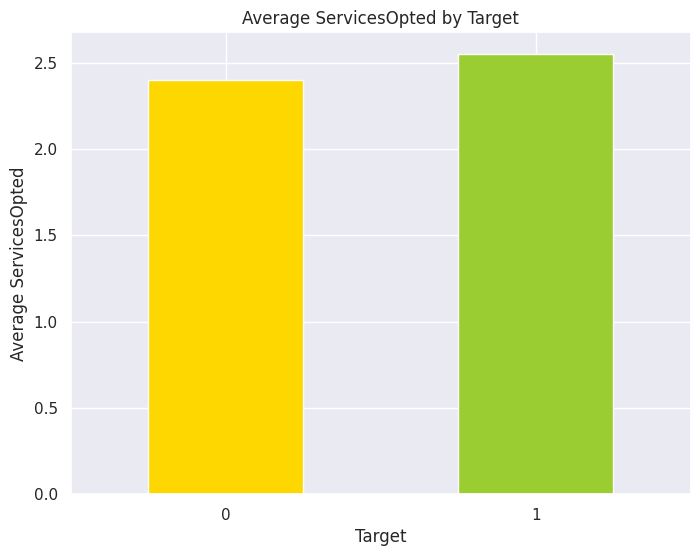

In [12]:
##Explore avg ServicesOpted by Target

##เพิ่มกราฟแสดงผล
# Create a bar plot to show the average ServicesOpted by Target
plt.figure(figsize=(8, 6))
avg_services_by_target.plot(kind="bar", color=["#FFD700", "#9ACD32"])  # Customize colors if needed
plt.title("Average ServicesOpted by Target")
plt.xlabel("Target")
plt.ylabel("Average ServicesOpted")
plt.xticks(rotation=0)
plt.show()



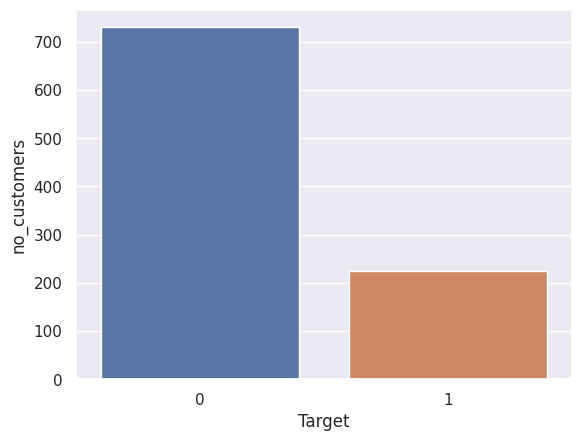

In [13]:
#Explore No. of customers by Target
df_noCust_by_target = df.groupby(by=['Target']).agg(
          no_customers=('Target','count')).reset_index()

sns.barplot(data=df_noCust_by_target, x='Target', y='no_customers')
plt.show()

<ipython-input-14-39ffe46151e7>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  no_customers=('Target','count')).reset_index().pivot('FrequentFlyer', 'Target', 'no_customers')


<Axes: xlabel='Target', ylabel='FrequentFlyer'>

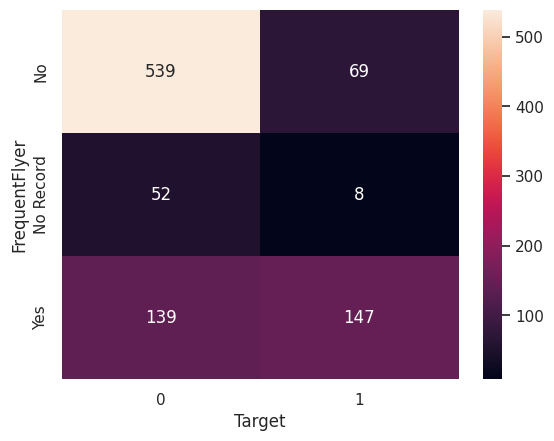

In [14]:
#Explore FrequentFlyer by Target

df_FrequentFlyer_by_target = df.groupby(by=['FrequentFlyer', 'Target']).agg(
                              no_customers=('Target','count')).reset_index().pivot('FrequentFlyer', 'Target', 'no_customers')

sns.heatmap(df_FrequentFlyer_by_target, annot=True, fmt='.0f')

##Annual Income Class by Target
ระดับรายได้ต่อปีของกลุ่มเป้าหมาย

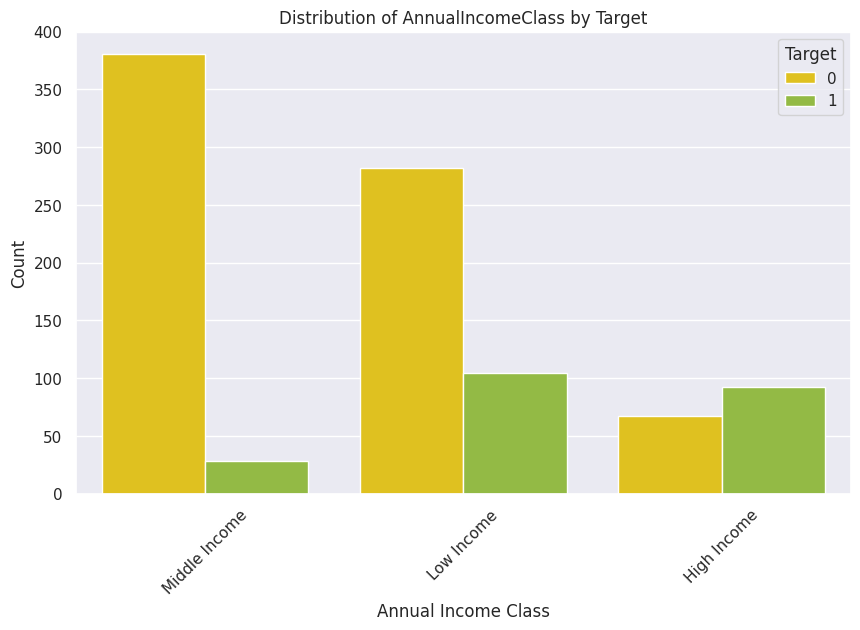

In [15]:
#Explore AnnualIncomeClass by Target

##เพิ่มกราฟแสดงผล
custom_palette = ["#FFD700", "#9ACD32"]  # Replace with your desired colors
# Create a bar plot to show the distribution of AnnualIncomeClass by Target
plt.figure(figsize=(10, 6))
sns.countplot(x="AnnualIncomeClass", hue="Target", data=df, palette=custom_palette)
plt.title("Distribution of AnnualIncomeClass by Target")
plt.xlabel("Annual Income Class")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Target")
plt.show()


เราสร้างกราฟแท่งโดยใช้ข้อมูลรายได้ประจำปี โดยแกน x แสดง Annual Income Class และแกน y แสดงจำนวนของคลาส

##Account Synced To SocialMedia
บัญชีที่ซิงค์กับโซเชียลมีเดีย

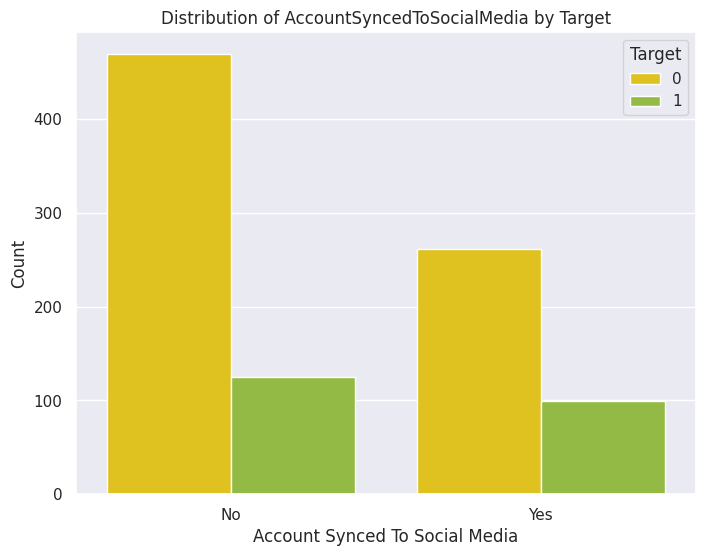

In [16]:
#Explore AccountSyncedToSocialMedia by Target

##เพิ่มกราฟแสดงผล
custom_palette = ["#FFD700", "#9ACD32"]  # Replace with your desired colors
# Create a bar plot to show the distribution of AccountSyncedToSocialMedia by Target
plt.figure(figsize=(8, 6))
sns.countplot(x="AccountSyncedToSocialMedia", hue="Target", data=df, palette=custom_palette)
plt.title("Distribution of AccountSyncedToSocialMedia by Target")
plt.xlabel("Account Synced To Social Media")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.legend(title="Target")
plt.show()




##Booked Hotel Or Not

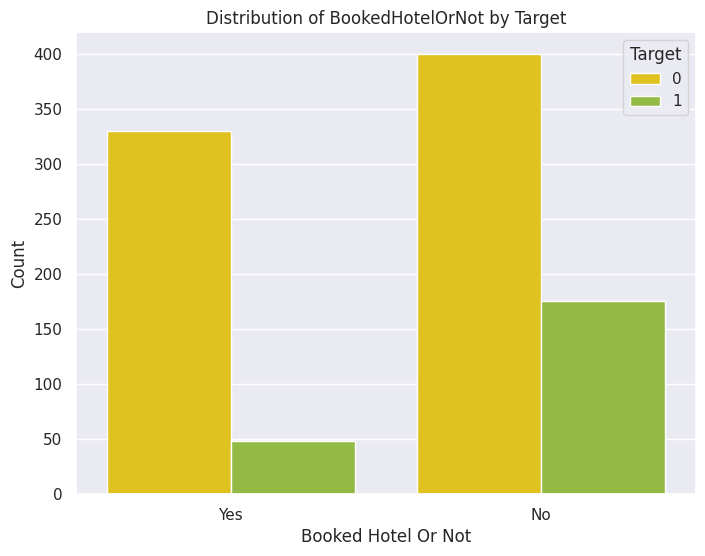

In [17]:
#Explore BookedHotelOrNot by Target

##เพิ่มกราฟแสดงผล
custom_palette = ["#FFD700", "#9ACD32"]  # Replace with your desired colors
# Create a bar plot to show the distribution of BookedHotelOrNot by Target
plt.figure(figsize=(8, 6))
sns.countplot(x="BookedHotelOrNot", hue="Target", data=df, palette=custom_palette)
plt.title("Distribution of BookedHotelOrNot by Target")
plt.xlabel("Booked Hotel Or Not")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.legend(title="Target")
plt.show()




#Data Processing

In [18]:
cat_data = pd.DataFrame()

cat_data = pd.concat([cat_data, pd.get_dummies(df['FrequentFlyer'], prefix='FrequentFlyer')], axis=1)
#cat_data = pd.concat([cat_data, pd.get_dummies(df['AnnualIncomeClass'], prefix='AnnualIncomeClass')], axis=1)

df['AnnualIncomeClass'] = df['AnnualIncomeClass'].map({'Low Income':0,
                             'Middle Income':1,
                             'High Income':2})


cat_data = pd.concat([cat_data, pd.get_dummies(df['AnnualIncomeClass'], prefix='AnnualIncomeClass')], axis=1)
#cat_data = pd.concat([cat_data, df['AnnualIncomeClass']], axis=1)
cat_data

,FrequentFlyer_No,FrequentFlyer_No Record,FrequentFlyer_Yes,AnnualIncomeClass_0,AnnualIncomeClass_1,AnnualIncomeClass_2
0,1,0,0,0,1,0
1,0,0,1,1,0,0
2,1,0,0,0,1,0
3,1,0,0,0,1,0
4,1,0,0,1,0,0
...,...,...,...,...,...,...
949,0,0,1,1,0,0
950,1,0,0,0,1,0
951,1,0,0,0,1,0
952,1,0,0,1,0,0


In [19]:
X = pd.concat([df[['Age', 'ServicesOpted']], cat_data], axis=1)
y = df['Target']

Model Creation and Evaluation

In [20]:
# models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# model selection and evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, roc_curve, auc

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

In [22]:
#Create Generic function to fit data and display results/predictions
def fit_evaluate(clf, X_train, X_test, y_train, y_test):
    # fit model to training data
    clf.fit(X_train, y_train)

    # make predictions for train data
    y_pred_train = clf.predict(X_train)

    # make predictions for test data
    y_pred_test = clf.predict(X_test)
    # print evaluation
    print(classification_report(y_test, y_pred_test))
    print('\nConfusion Matrix: \n')
    s = sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt='g', cmap='YlGnBu');
    s.set(xlabel='Predicted class', ylabel='True class')
    plt.show()

    #การทำ ROC Curve -----
    fpr_train, tpr_train, _ = roc_curve(y_pred_train,  y_train)
    auc_train = roc_auc_score(y_pred_train, y_train)
    plt.plot(fpr_train,tpr_train, color='Blue', label='train: auc='+f'{auc_train:.2f}')
    #การทำ ROC Curve -----

    fpr_test, tpr_test, _ = roc_curve(y_pred_test,  y_test)
    auc_test = roc_auc_score(y_pred_test, y_test)
    plt.plot(fpr_test,tpr_test, color='Red', label='test: auc='+f'{auc_test:.2f}')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.legend(loc=4)
    plt.show()

* Logistic regression * 



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.84      0.93      0.88       291
           1       0.67      0.43      0.52        91

    accuracy                           0.81       382
   macro avg       0.76      0.68      0.70       382
weighted avg       0.80      0.81      0.80       382


Confusion Matrix: 



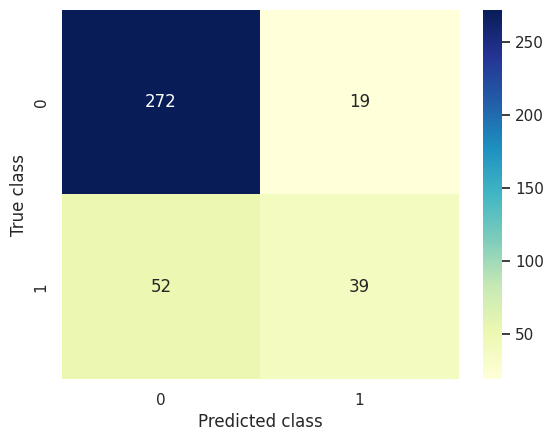

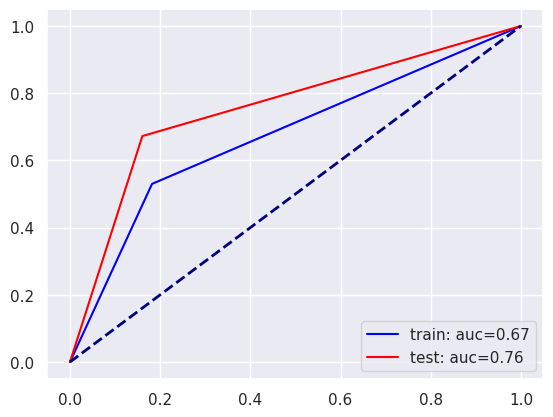

In [23]:
#ต้องการดูการค่า 1 -- LogisticRegression คือ 0 กับ 1 เท่านั้น
modelLR = LogisticRegression()
print('* Logistic regression * \n')
fit_evaluate(modelLR, X_train, X_test, y_train, y_test)

###RandomForest

* Random Forest Classifier * 

              precision    recall  f1-score   support

           0       0.89      0.92      0.91       291
           1       0.72      0.63      0.67        91

    accuracy                           0.85       382
   macro avg       0.80      0.78      0.79       382
weighted avg       0.85      0.85      0.85       382


Confusion Matrix: 



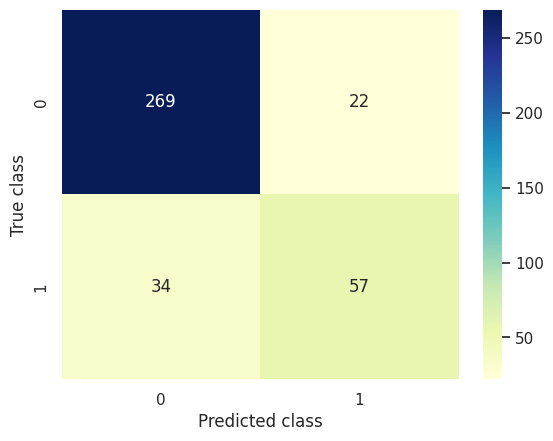

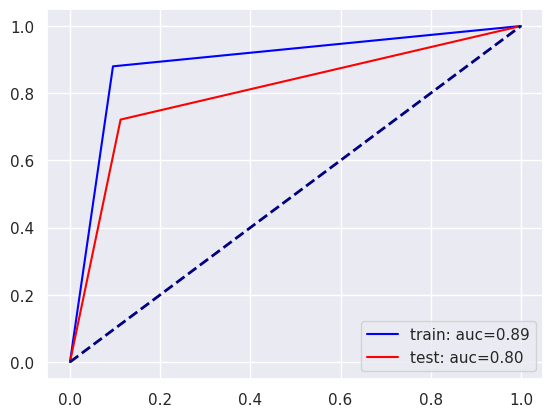

In [24]:
modelRF = RandomForestClassifier()
print('* Random Forest Classifier * \n')
fit_evaluate(modelRF, X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.89      0.92      0.90       291
           1       0.71      0.64      0.67        91

    accuracy                           0.85       382
   macro avg       0.80      0.78      0.79       382
weighted avg       0.85      0.85      0.85       382


Confusion Matrix: 



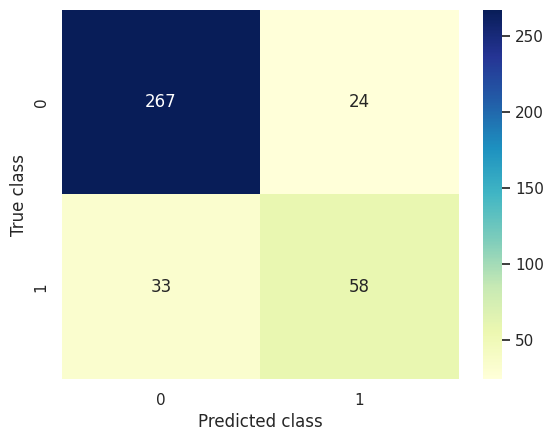

F1-score:  0.6705202312138727


In [25]:
from sklearn.metrics import f1_score

def fit_evaluate(clf, X_train, X_test, y_train, y_test):
    # fit model to training data
    clf.fit(X_train, y_train)

    # make predictions for train data
    y_pred_train = clf.predict(X_train)

    # make predictions for test data
    y_pred_test = clf.predict(X_test)

    # print evaluation
    print(classification_report(y_test, y_pred_test))
    print('\nConfusion Matrix: \n')
    s = sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt='g', cmap='YlGnBu')
    s.set(xlabel='Predicted class', ylabel='True class')
    plt.show()

    # calculate f1-score
    f1 = f1_score(y_test, y_pred_test)

    # return f1-score
    return f1

# ใช้ฟังก์ชัน fit_evaluate เพื่อสร้างและประเมินโมเดล และเก็บค่า f1-score ไว้ที่ตัวแปร
f1_score_RF = fit_evaluate(modelRF, X_train, X_test, y_train, y_test)
print("F1-score: ", f1_score_RF)


* K Nearest Neighbors Classifier * 

              precision    recall  f1-score   support

           0       0.89      0.94      0.91       291
           1       0.77      0.62      0.68        91

    accuracy                           0.86       382
   macro avg       0.83      0.78      0.80       382
weighted avg       0.86      0.86      0.86       382


Confusion Matrix: 



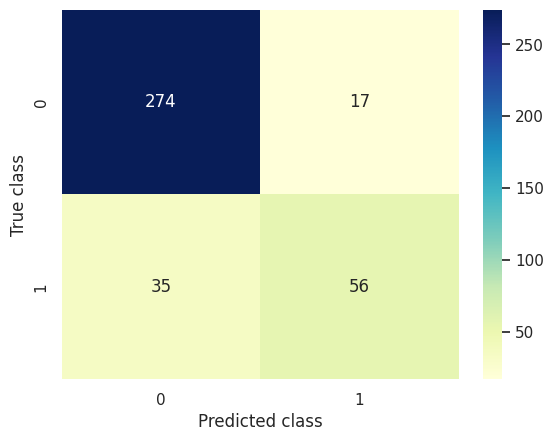

0.6829268292682927

In [26]:
modelKNN = KNeighborsClassifier()
print('* K Nearest Neighbors Classifier * \n')
fit_evaluate(modelKNN, X_train, X_test, y_train, y_test)

##SMOTE -- Synthetic Minority Oversampling Technique

In [27]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=0)

sm.fit(X_train, y_train)
#การทำ resample ของข้อมูลที่นำเข้ามาให้ระบบ
X_train_SMOTE, y_train_SMOTE = sm.fit_resample(X_train, y_train)

* SMOTE and Logistic regression * 

              precision    recall  f1-score   support

           0       0.90      0.81      0.85       291
           1       0.54      0.71      0.61        91

    accuracy                           0.79       382
   macro avg       0.72      0.76      0.73       382
weighted avg       0.81      0.79      0.79       382


Confusion Matrix: 



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


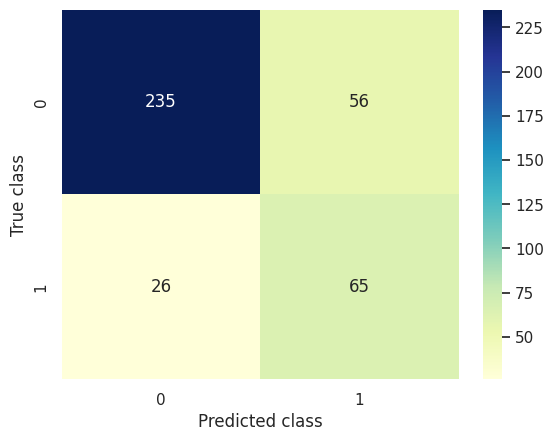

0.6132075471698114

In [28]:
modelLR = LogisticRegression()
print('* SMOTE and Logistic regression * \n')
fit_evaluate(modelLR, X_train_SMOTE, X_test, y_train_SMOTE, y_test)

* SMOTE and Random Forest Classifier * 

              precision    recall  f1-score   support

           0       0.92      0.86      0.89       291
           1       0.62      0.75      0.68        91

    accuracy                           0.83       382
   macro avg       0.77      0.80      0.78       382
weighted avg       0.85      0.83      0.84       382


Confusion Matrix: 



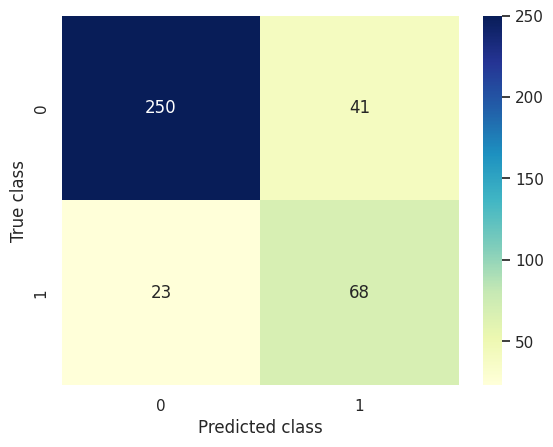

0.68

In [29]:
modelRF = RandomForestClassifier()
print('* SMOTE and Random Forest Classifier * \n')
fit_evaluate(modelRF, X_train_SMOTE, X_test, y_train_SMOTE, y_test)

* SMOTE and K Nearest Neighbors Classifier * 

              precision    recall  f1-score   support

           0       0.90      0.85      0.87       291
           1       0.59      0.70      0.64        91

    accuracy                           0.81       382
   macro avg       0.75      0.78      0.76       382
weighted avg       0.83      0.81      0.82       382


Confusion Matrix: 



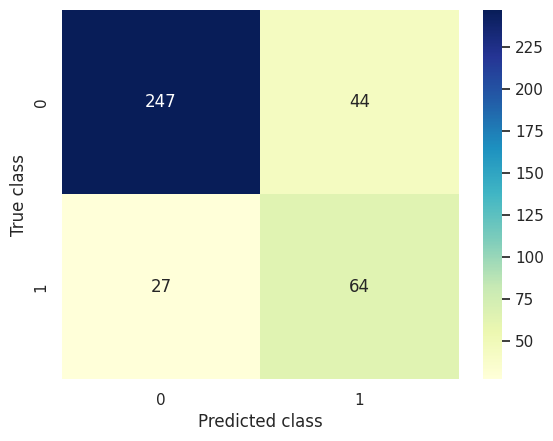

0.6432160804020101

In [30]:
modelKNN = KNeighborsClassifier()
print('* SMOTE and K Nearest Neighbors Classifier * \n')
fit_evaluate(modelKNN, X_train_SMOTE, X_test, y_train_SMOTE, y_test)

* SMOTE and XGBoost Classifier * 

              precision    recall  f1-score   support

           0       0.92      0.86      0.89       291
           1       0.64      0.77      0.70        91

    accuracy                           0.84       382
   macro avg       0.78      0.82      0.79       382
weighted avg       0.85      0.84      0.85       382


Confusion Matrix: 



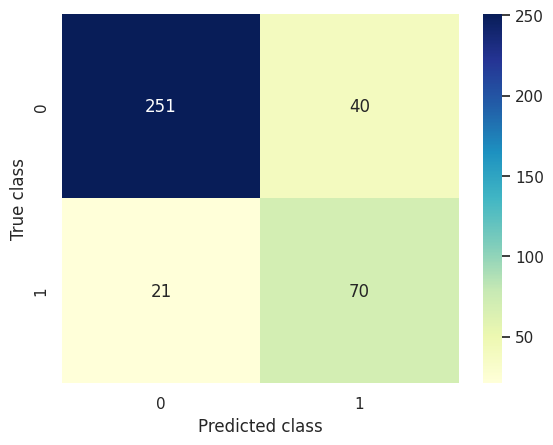

0.6965174129353234

In [31]:
import xgboost as xgb

#modelKNN = KNeighborsClassifier()
modelXGB = xgb.XGBClassifier(objective='binary:logistic', eval_metric="auc")
print('* SMOTE and XGBoost Classifier * \n')
fit_evaluate(modelXGB, X_train_SMOTE, X_test, y_train_SMOTE, y_test)

##Oversampling

In [32]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)
ros.fit(X_train, y_train)
X_oversampled, y_oversampled = ros.fit_resample(X_train, y_train)

##Oversampling -- LR

* Oversampling and Logistic regression * 

              precision    recall  f1-score   support

           0       0.92      0.76      0.83       291
           1       0.51      0.79      0.62        91

    accuracy                           0.77       382
   macro avg       0.72      0.78      0.73       382
weighted avg       0.82      0.77      0.78       382


Confusion Matrix: 



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


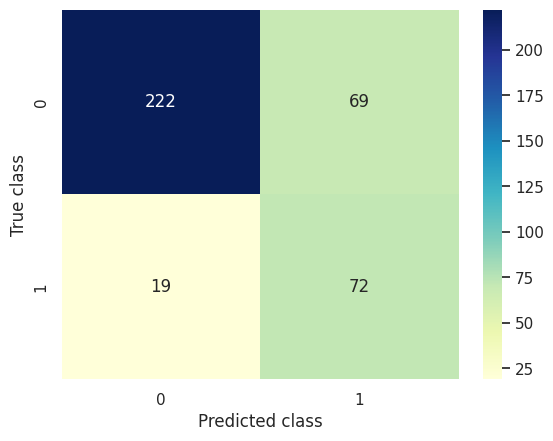

0.6206896551724138

In [33]:
modelLR = LogisticRegression()
print('* Oversampling and Logistic regression * \n')
fit_evaluate(modelLR, X_oversampled, X_test, y_oversampled, y_test)

##Oversampling -- RF

* Oversampling and Random Forest Classifier * 

              precision    recall  f1-score   support

           0       0.93      0.81      0.87       291
           1       0.57      0.80      0.67        91

    accuracy                           0.81       382
   macro avg       0.75      0.81      0.77       382
weighted avg       0.84      0.81      0.82       382


Confusion Matrix: 



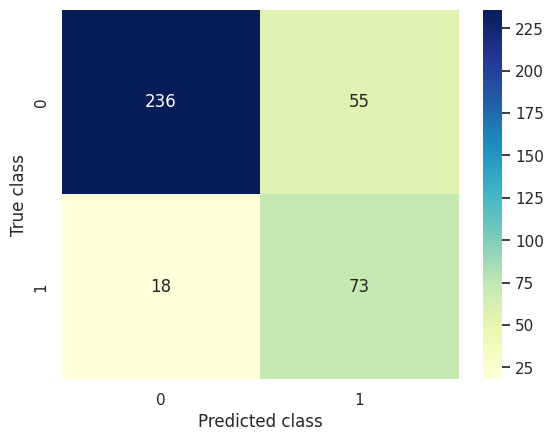

0.6666666666666666

In [34]:
modelRF = RandomForestClassifier()
print('* Oversampling and Random Forest Classifier * \n')
fit_evaluate(modelRF, X_oversampled, X_test, y_oversampled, y_test)


##Oversampling -- KNN

* Oversampling and K Nearest Neighbors Classifier * 

              precision    recall  f1-score   support

           0       0.90      0.86      0.88       291
           1       0.62      0.70      0.66        91

    accuracy                           0.82       382
   macro avg       0.76      0.78      0.77       382
weighted avg       0.83      0.82      0.83       382


Confusion Matrix: 



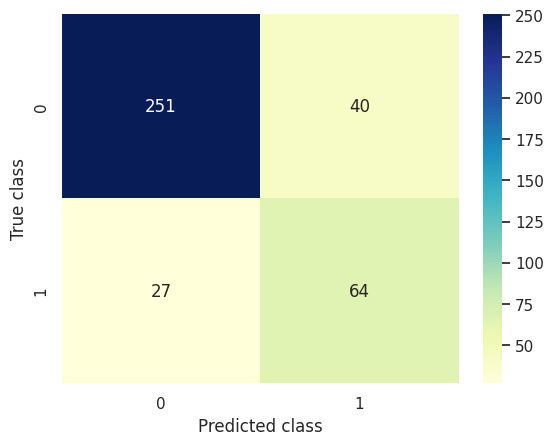

0.6564102564102564

In [35]:
modelKNN = KNeighborsClassifier()
print('* Oversampling and K Nearest Neighbors Classifier * \n')
fit_evaluate(modelKNN, X_oversampled, X_test, y_oversampled, y_test)


##Oversampling -- XGBoost

* Oversampling and XGBoost Classifier * 

              precision    recall  f1-score   support

           0       0.94      0.83      0.88       291
           1       0.60      0.82      0.69        91

    accuracy                           0.83       382
   macro avg       0.77      0.83      0.79       382
weighted avg       0.86      0.83      0.84       382


Confusion Matrix: 



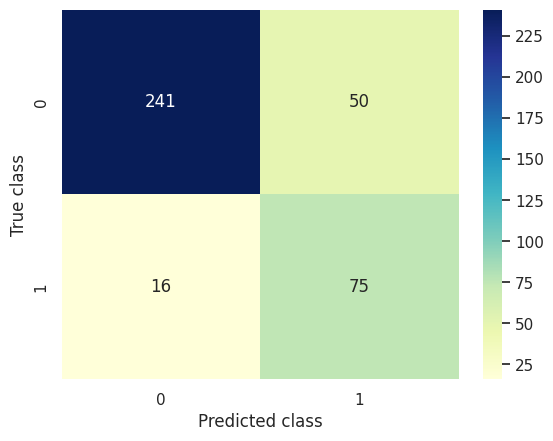

0.6944444444444445

In [36]:
import xgboost as xgb

#modelKNN = KNeighborsClassifier()
modelXGB = xgb.XGBClassifier(objective='binary:logistic', eval_metric="auc")
print('* Oversampling and XGBoost Classifier * \n')
fit_evaluate(modelXGB, X_oversampled, X_test, y_oversampled, y_test)


##Undersampling

In [37]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)
rus.fit(X_train, y_train)
X_undersampled, y_undersampled = rus.fit_resample(X_train, y_train)

##Undersampling -- LR

* Undersampling and Logistic regression * 

              precision    recall  f1-score   support

           0       0.92      0.74      0.82       291
           1       0.49      0.79      0.60        91

    accuracy                           0.75       382
   macro avg       0.70      0.77      0.71       382
weighted avg       0.82      0.75      0.77       382


Confusion Matrix: 



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


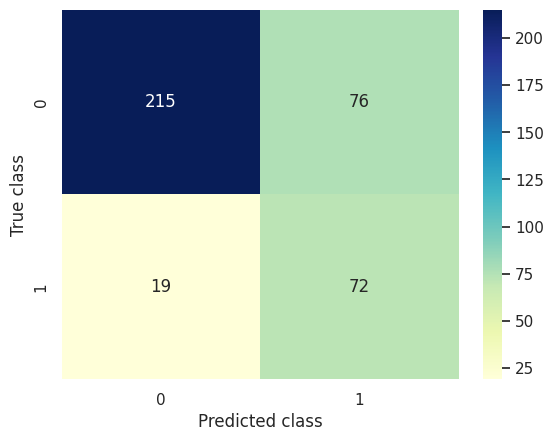

0.602510460251046

In [38]:
modelLR = LogisticRegression()
print('* Undersampling and Logistic regression * \n')
fit_evaluate(modelLR, X_undersampled, X_test, y_undersampled, y_test)

##Undersampling -- KNN

* Undersampling and Random Forest Classifier * 

              precision    recall  f1-score   support

           0       0.95      0.75      0.84       291
           1       0.52      0.88      0.66        91

    accuracy                           0.78       382
   macro avg       0.74      0.81      0.75       382
weighted avg       0.85      0.78      0.79       382


Confusion Matrix: 



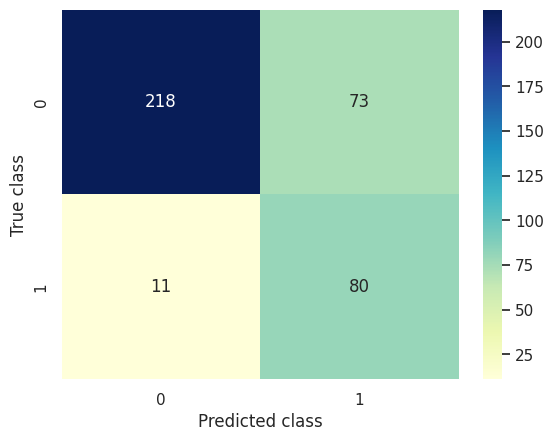

0.6557377049180328

In [39]:
modelRF = RandomForestClassifier()
print('* Undersampling and Random Forest Classifier * \n')
fit_evaluate(modelRF, X_undersampled, X_test, y_undersampled, y_test)

##Undersampling -- XGboost

* Undersampling and XGBoost Classifier * 

              precision    recall  f1-score   support

           0       0.93      0.77      0.84       291
           1       0.53      0.82      0.64        91

    accuracy                           0.78       382
   macro avg       0.73      0.80      0.74       382
weighted avg       0.84      0.78      0.80       382


Confusion Matrix: 



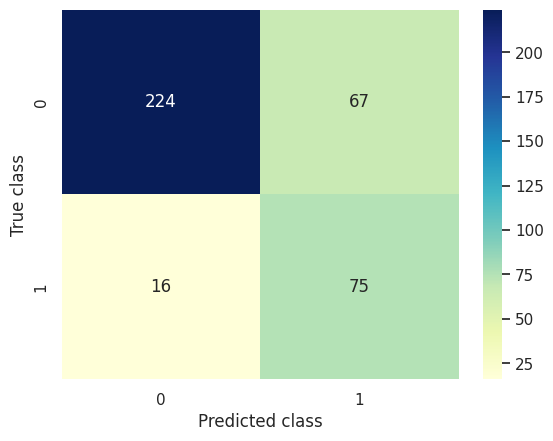

0.6437768240343348

In [40]:
import xgboost as xgb

#modelKNN = KNeighborsClassifier()
modelXGB = xgb.XGBClassifier(objective='binary:logistic', eval_metric="auc")
print('* Undersampling and XGBoost Classifier * \n')
fit_evaluate(modelXGB, X_undersampled, X_test, y_undersampled, y_test)

#XGBoost

* XGBoost Classifier * 

              precision    recall  f1-score   support

           0       0.89      0.94      0.92       291
           1       0.77      0.64      0.70        91

    accuracy                           0.87       382
   macro avg       0.83      0.79      0.81       382
weighted avg       0.86      0.87      0.86       382


Confusion Matrix: 



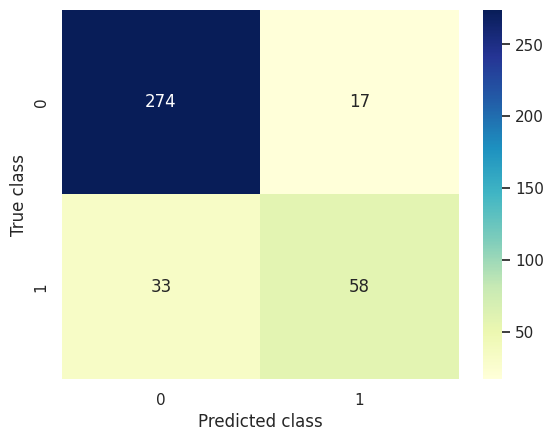

0.6987951807228915

In [41]:
import xgboost as xgb

modelXGB = xgb.XGBClassifier(objective='binary:logistic', eval_metric="auc")
print('* XGBoost Classifier * \n')
fit_evaluate(modelXGB, X_train, X_test, y_train, y_test)

##XGBoost - Hyperparameter Tuning

In [42]:
## building pipeline for hyperparameter tuning

from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2

# Create a pipeline
pipe = Pipeline([
  ('fs', SelectKBest()),
  ('clf', xgb.XGBClassifier(objective='binary:logistic', scale_pos_weight=9))
])

In [43]:
## hyper parameter tuning - grid search

from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer
# Define our search space for grid search
search_space = [
  {
    'clf__n_estimators': [50, 100, 150, 200],
    'clf__learning_rate': [0.01, 0.1],
    'clf__max_depth': range(2, 4),
    'clf__colsample_bytree': [i/10.0 for i in range(2, 5)],
    'clf__gamma': [i/10.0 for i in range(3)],
    'fs__score_func': [chi2],
    'fs__k': [2],
  }
]
# Define cross validation
kfold = KFold(n_splits=5)
# AUC and accuracy as score
scoring = {'AUC':'roc_auc', 'Accuracy':make_scorer(accuracy_score), 'F1 score': 'f1_micro'}
# Define grid search
grid = GridSearchCV(
  pipe,
  param_grid=search_space,
  cv=kfold,
  scoring=scoring,
  refit='AUC',
  verbose=1,
  n_jobs=-1
)

# Fit grid search
xgb_model_clv_GS = grid.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


In [44]:
print(xgb_model_clv_GS.best_params_)

{'clf__colsample_bytree': 0.2, 'clf__gamma': 0.0, 'clf__learning_rate': 0.01, 'clf__max_depth': 2, 'clf__n_estimators': 50, 'fs__k': 2, 'fs__score_func': <function chi2 at 0x7bd33b617640>}


* XGBoost Classifier * 

              precision    recall  f1-score   support

           0       0.82      0.98      0.89       291
           1       0.84      0.30      0.44        91

    accuracy                           0.82       382
   macro avg       0.83      0.64      0.67       382
weighted avg       0.82      0.82      0.78       382


Confusion Matrix: 



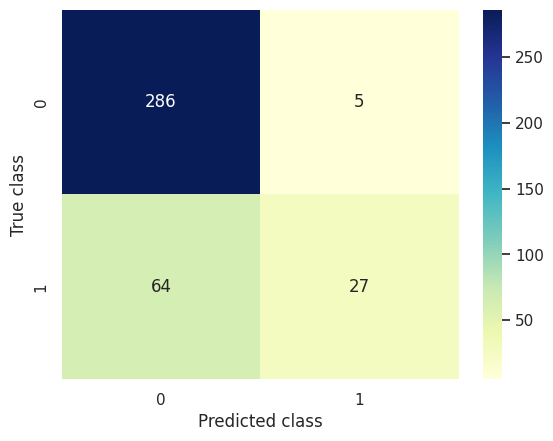

0.43902439024390244

In [45]:
modelXGB = xgb.XGBClassifier(
 learning_rate =0.01,
 n_estimators=100,
 max_depth=2,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.4,
 objective= 'binary:logistic',
 eval_metric="auc")
print('* XGBoost Classifier * \n')
fit_evaluate(modelXGB, X_train, X_test, y_train, y_test)

#เอาค่า F1-scores ของทุกโมเดลมาเก็บแสดงค่า

In [46]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import make_scorer, f1_score
import xgboost as xgb

# Define our search space for grid search
search_space = [
  {
    'clf__n_estimators': [100, 200, 300, 400],
    'clf__learning_rate': [0.01, 0.1],
    'clf__max_depth': [3, 4, 5],
    'clf__colsample_bytree': [i/10.0 for i in range(2, 5)],
    'clf__gamma': [i/10.0 for i in range(3)],
    'fs__score_func': [f_classif],
    'fs__k': ['all'],
  }
]

# Define cross validation
kfold = KFold(n_splits=5)

# F1 score as score
scoring = {'F1 score': 'f1_micro'}

# Define grid search
grid = GridSearchCV(
  pipe,
  param_grid=search_space,
  cv=kfold,
  scoring=scoring,
  refit='F1 score',
  verbose=1,
  n_jobs=-1
)

# Fit grid search
xgb_model_clv_GS = grid.fit(X_train, y_train)

# Get best parameters and best F1 score
best_params = xgb_model_clv_GS.best_params_
best_score = xgb_model_clv_GS.best_score_

# Print best parameters and best F1 score
print("Best Parameters:", best_params)
print("Best F1 Score:", best_score)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'clf__colsample_bytree': 0.4, 'clf__gamma': 0.1, 'clf__learning_rate': 0.1, 'clf__max_depth': 5, 'clf__n_estimators': 200, 'fs__k': 'all', 'fs__score_func': <function f_classif at 0x7bd33b617880>}
Best F1 Score: 0.7884057971014492


##นำค่าคะแนน  F1 Score มาวัดประสิทธิภาพของแบบจำลองทั้งหมด

**Best F1 Score:**

- ค่า F1-Score ที่ดีที่สุด ได้จากการทดสอบคือ 0.7884057971014492
  (ค่าประสิทธิภาพอยู่ในช่วง ระหว่าง 0-1)
- จำนวนการทดลองทั้งหมด totalling 1080 fits

**Best Parameters:**

- 'clf__colsample_bytree': 0.4
- 'clf__gamma': 0.1
- 'clf__learning_rate': 0.1
- 'clf__max_depth': 5
- 'clf__n_estimators': 200
- 'fs__k': 'all'
- 'fs__score_func': f_classif at 0x7bc7a3436200

